# TOC

- Dataframe
    - creation
    - merging
    - long form and wide form

In [35]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe creation

In [3]:
amap = dict(
    k1=1,
    k2=2,
    k3=3,
)

amaplist = dict(
    k1=['a', 'b'],
    k2=['c', 'd'],
    k3=['e', 'f']
)

key as index

In [14]:
pd.DataFrame.from_dict(amap, orient='index', columns=['val'])

,val
k1,1
k2,2
k3,3


key as columns

In [23]:
## these 3 are the same

#pd.DataFrame.from_dict(amaplist, orient='columns')
#pd.DataFrame.from_dict(amaplist)
pd.DataFrame(amaplist)

,k1,k2,k3
0,a,c,e
1,b,d,f


In [25]:
pd.DataFrame([amap])

,k1,k2,k3
0,1,2,3


## Datframe merging

In [51]:
df1 = pd.DataFrame([[1, 2, 3]], columns=['c1', 'c2', 'c3'])
df2 = pd.DataFrame([[4, 5, 6]], columns=['c1', 'c2', 'c3'])
ls = [7, 8, 9]
amap=dict(c1=10, c2=11, c3=12)

new row

In [33]:
pd.concat([df1, df2])

,c1,c2,c3
0,1,2,3
0,4,5,6


In [44]:
pd.concat([df1, pd.DataFrame([amap])], ignore_index=True)

,c1,c2,c3
0,1,2,3
1,10,11,12


In [50]:
# inplace append
df1.loc[1] = ls
df1

,c1,c2,c3
0,1,2,3
1,7,8,9


## Dataframe long form and wide form

because libs favor different forms while wide form is more apearing to human.

In [5]:
data = load_iris()

In [89]:
## preprae a demo wide form
df_wide, y = load_iris(return_X_y=True, as_frame=True)
df_wide.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_wide.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
54,6.5,2.8,4.6,1.5
114,5.8,2.8,5.1,2.4
49,5.0,3.3,1.4,0.2
98,5.1,2.5,3.0,1.1
86,6.7,3.1,4.7,1.5
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
13,4.3,3.0,1.1,0.1
135,7.7,3.0,6.1,2.3


convert wide to long

In [57]:
df_long = df_wide.rename_axis('id').reset_index().melt(id_vars='id')
df_long.sample(10)

,id,variable,value
0,0,sepal_length,5.1
431,131,petal_length,6.4
418,118,petal_length,6.9
486,36,petal_width,0.2
375,75,petal_length,4.4
16,16,sepal_length,5.4
185,35,sepal_width,3.2
547,97,petal_width,1.3
338,38,petal_length,1.3
434,134,petal_length,5.6


convert long to wide

In [88]:
df_long.pivot(index='id', columns='variable', values='value').rename_axis(index='', columns='').sample(10)

,petal_length,petal_width,sepal_length,sepal_width
,,,,
50,4.7,1.4,7.0,3.2
19,1.5,0.3,5.1,3.8
25,1.6,0.2,5.0,3.0
36,1.3,0.2,5.5,3.5
83,5.1,1.6,6.0,2.7
40,1.3,0.3,5.0,3.5
138,4.8,1.8,6.0,3.0
91,4.6,1.4,6.1,3.0
32,1.5,0.1,5.2,4.1


pandas favor wide form

seaborn favor long form

<AxesSubplot:xlabel='id', ylabel='value'>

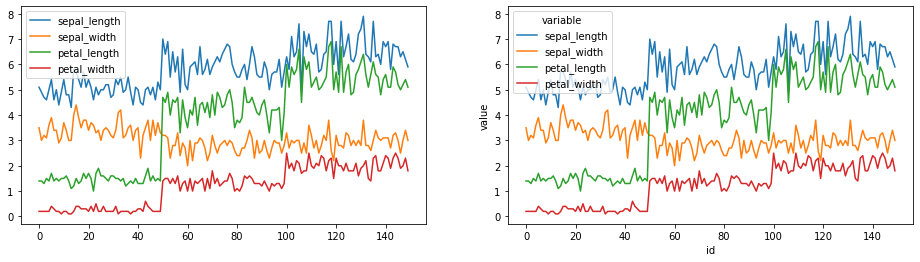

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
df_wide.plot(ax=axes[0])
sns.lineplot(data=df_long, x='id', y='value', hue='variable', ax=axes[1])